# Digital Signal Processing - 4


## Signals

Signals come in - random and deterministic.

A random signal is a function of time whose values are not known in advance and can only be predicted with some probability. The main characteristics of random signals include:

- distribution law (the relative residence time of the signal value in a certain interval),
- spectral power distribution.

Random signals are divided into two classes:  
1) noise - random oscillations consisting of a set of different frequencies and amplitudes,   
2) signals that carry information, for the processing of which it is necessary to resort to probabilistic methods.

Random signals are characterized by a density of probability distribution. Probability density is one way to specify the distribution of random variables. The probability density is a non-negative function for any value of a discrete signal. For analog random signals, the integral of the signal function in the entire range of values ​​tends to unity. For discrete random variables, there is no probability density function, because discrete random variable is not a continuous function. However, the mathematical apparatus allows us to calculate approximate values of the function.

Simple examples of discrete random variables:

- the number of heads dropped and the number of tails dropped when tossing a coin a countable number N times,
- the number of hits in the target with a limited number of shots.
- instrument measurement errors

## Random signals

The probability density of a random signal allows us to determine the mathematical moments of different orders:

     Mathematical expectation: average value of a sequence of random variables
     
$m = \frac{1}{N}\sum_{n=0}^{N-1}x(n)$
     
     Mathematical expectation in signal theory is often understood as the signal shift in level relative to 
     zero (constant component).

In python, the `mean()` method is used to calculate the mathematical expectation

     Dispersion: the average value of the squared differences between the values of the sequence and its 
     average value
     
$\sigma^2 = \frac{1}{N-1}\sum_{n=0}^{N-1}|x(n) - m|^{2}$ 

In python, the `var()` - method is used to calculate the variance, and the `std()` method is used to find the standard deviation.
     

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, rfft

%matplotlib inline

Random discrete signal at $ N = 100,000 $ samples and its probability density:

Mean of the signal: -0.032692104037689
Std. of the signal: 10.020365002664889


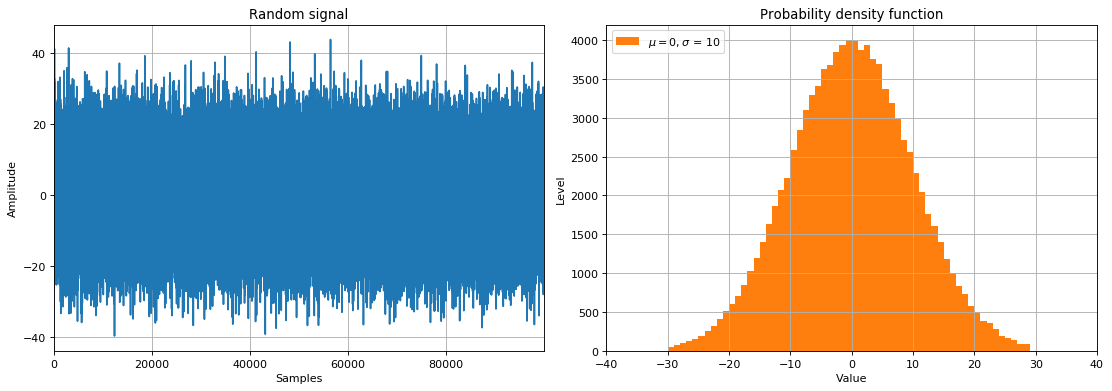

In [2]:
N = 100000

# Random signal
m, s = 0, 10
np.random.seed(2)
sig = np.random.normal(m, s, N)

# Create hist for PDF
hist, _ = np.histogram(sig, bins=list(range(0, 256)))

# Plot figure
fig = plt.figure(1, figsize=(14, 5), dpi=80)
plt.subplot(1, 2, 1)
plt.title('Random signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.plot(sig, color='C0')
plt.xlim([0, N-1])
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Probability density function')
plt.xlabel('Value')
plt.ylabel('Level')
plt.xlim([-4*s, 4*s])
plt.hist(sig, bins=list(range(-s*3, s*3)), color='C1', label=r'$\mu = %d, \sigma$ = %d' % (m, s))
plt.grid()
plt.legend(loc='upper left')
plt.tight_layout()

print('Mean of the signal:', np.mean(sig))
print('Std. of the signal:', np.std(sig))

## Normal distribution

According to the central limit theorem, the sum of a large number of weakly dependent random variables has a distribution close to normal. Moreover, random variables are distributed within a certain scale, that is, none of the values ​​makes a significant contribution to the final amount.

Normal distribution (Gaussian distribution) - probability distribution, which is given by the function:

$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{- \frac{(x-\mu)^2}{2\sigma^2}}$

where $\mu$
is the mathematical expectation (average value of a random process), and $\sigma$

- standard deviation.

Normal distribution is considered standard if $\mu$ = 0, $\sigma$ = 1

**Three Sigma Rule  $3\sigma$**

The rule of three sigma states that with probability 𝑃 = 0.997
the values of the normally distributed sequence lie in the range of triple the standard deviation. In other words, almost all values ​​of the random process lie in the interval of three sigma, that is, in the range $(x-3\sigma, x+3\sigma)$. 

Below are graphs of the probability density and distribution functions of the normal distribution law for various parameters of mathematical expectation and variance.

For plotting, the `norm(mu, sigma)` method from the `numpy.stats` package is used, and not the `randn()` function from the numpy.random package. This is due to the fact that `norm()` returns an object that has PDF methods - probability density and CDF - distribution functions of a random variable.
.

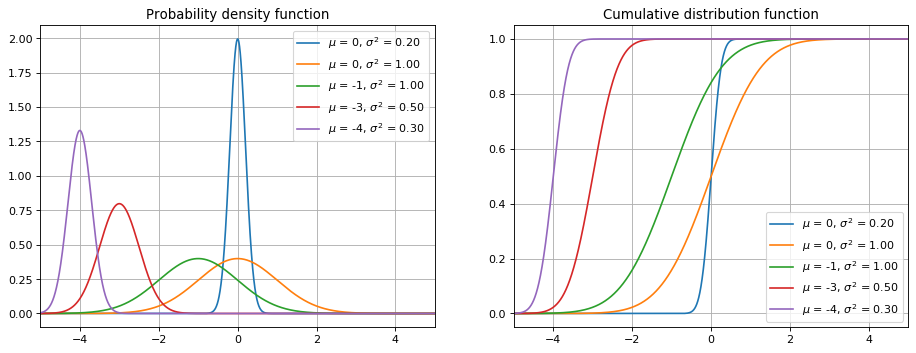

In [3]:
from scipy.stats import norm

# Gaussian parameters
mu = [0, 0, -1, -3, -4]
sg = [0.2, 1, 1, 0.5, 0.3]

# Create Normal distributions
pxn = [norm(mu[i], sg[i]) for i in range(5)]

tt = np.linspace(-5, 5, N)
# Plot PDF and CDF
fig = plt.figure(1, figsize=(14, 5), dpi=80)

plt.subplot(1,2,1)
plt.title('Probability density function')
for i in range(5):
    plt.plot(tt, pxn[i].pdf(tt), color='C'+str(i), markersize=2, label='$\mu$ = %d, $\sigma^2$ = %0.2f' % (mu[i], sg[i]))
plt.legend(loc='upper right')
plt.xlim([-5, 5])
plt.grid(True)

plt.subplot(1,2,2)
plt.title('Cumulative distribution function')
for i in range(5):
    plt.plot(tt, pxn[i].cdf(tt), color='C'+str(i), markersize=2, label='$\mu$ = %d, $\sigma^2$ = %0.2f' % (mu[i], sg[i]))
plt.legend(loc='lower right')
plt.xlim([-5, 5])
plt.grid(True)

## Random process length

Based on the central limit theorem, the longer the random process, the stronger it looks like a normal (Gaussian) distribution. It can be shown that with increasing signal length, the probability density function tends to the normal distribution function.

We set the length of the random sequence $N = 100, 1000, 10000, 100000$
counts. The graphs below show how the length of a random process affects the shape of the probability density graph.

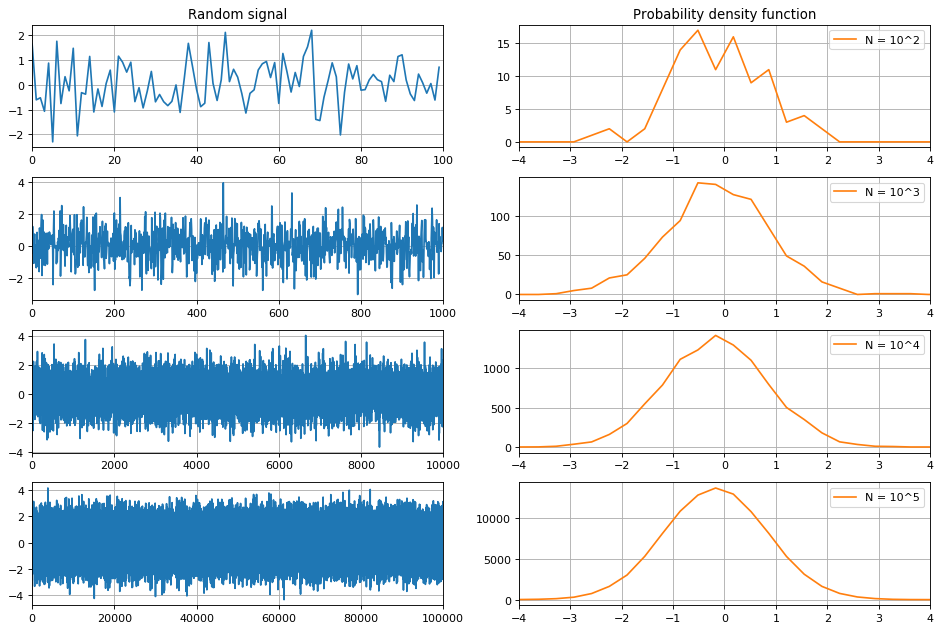

In [4]:
N = 10 ** np.arange(2,6)

# Set random seed
np.random.seed(1)

plt.figure(figsize=(12, 8), dpi=80)
for i in range(len(N)):

    # create random signal
    dat = np.random.normal(size=N[i])
    # hist and bins
    hist, bins = np.histogram(dat, np.linspace(-5, 5, 30))
    # probability density function
    pdf = norm.pdf(bins)
    
    plt.subplot(len(N), 2, 2*i+1)
    if i == 0:
        plt.title('Random signal')
    plt.plot(dat)
    plt.xlim([0, dat.size])
    plt.grid(True)
    
    plt.subplot(len(N), 2, 2*i+2)
    if i == 0:
        plt.title('Probability density function')
    plt.plot(bins[:-1], hist, color='C1', label='N = 10^{}'.format(int(np.log10(N[i]))))
    plt.xlim([-4, 4])
    plt.legend(loc='upper right')
    plt.grid(True)
plt.tight_layout()

## Python library 
The scipy library contains the * stats package, which complements (and partially redefines) the functionality of the random package. Here is a list of the main functions from the random package:
    
| **Function** | **Description** |
| --- | --- |
| `rand (d0, d1, ..., dn)` | Uniform distribution (returns an N-dimensional array) |
| `randn (d0, d1, ..., dn)` | Standard normal distribution (returns an N-dimensional array) |
| `randint (low [, high, size, dtype])` | Array of integer values ​​in a given range |
| `random ([size])` | Uniform distribution in the range $ [0.0, 1.0) $ |
| `shuffle (x)` | Rearrange sequence elements on the fly |
| `permutation (x)` | Rearrange array elements or return their indices |
| `normal ([loc, scale, size])` | Array of random numbers distributed according to the normal law |
| `pareto (a [, size])` | Array of random numbers distributed according to Pareto law |
| `poisson ([lam, size])` | Array of random numbers distributed according to Poisson's law |
| `rayleigh ([scale, size])` | Array of random numbers distributed according to Rayleigh law |
| `seed ([seed])` | Initializing a Pseudo Random Value |


In the tasks of digital signal processing, random processes play an important role. Using random variables, one can simulate the effect of a real medium on the passage of a signal from a source to a data receiver. Often, when a signal passes through some noisy link, the so-called **white noise** is added to the signal. As a rule, the spectral density of such noise is uniformly (equally) distributed at all frequencies, and noise values ​​in the time domain are normally distributed (Gaussian distribution law). Since white noise is physically added to signal amplitudes in selected time samples, it is called **additive**. Thus, the main source of noise is called *additive white Gaussian noise* (AWGN - Additive white Gaussian noise).

It is worth noting that the term white is associated with the fact that the spectral components are evenly distributed over the entire frequency range. Since the frequency values are evenly distributed, the autocorrelation function (ACF) of white noise ideally tends to a **delta function**.

We give a graph of white noise in the time domain, and also construct its ACF. As a white noise generator, we use the `randn()` function from the random package

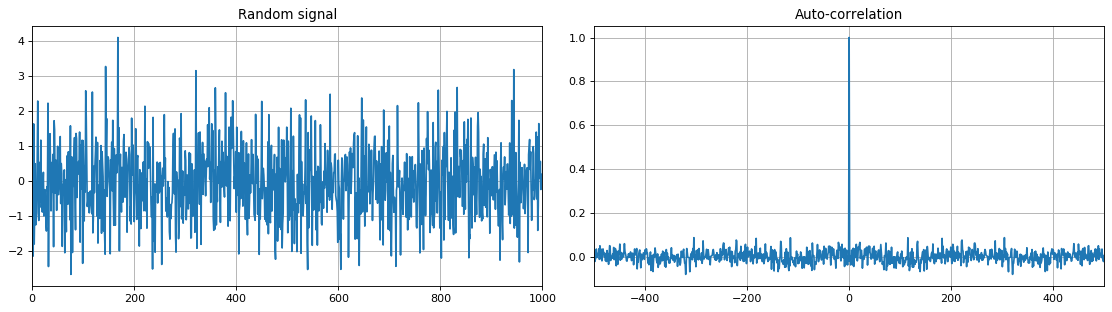

In [5]:
# Auto-correlation function
def auto_corr(x):
    res = np.correlate(x, x, mode='same')
    return res / np.max(res)

N = 1000
# Random signal
np.random.seed(2)
dat = np.random.randn(N)

# ACF: Auto-correlation
cfx = auto_corr(dat)

plt.figure(figsize=(14, 4), dpi=80)
plt.subplot(1, 2, 1)
plt.title('Random signal')
plt.plot(dat)
plt.xlim([0, dat.size])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Auto-correlation')
plt.plot(np.linspace(-N//2, N//2, N), cfx)
plt.xlim([-N//2, N//2])
plt.grid(True)
plt.tight_layout()